<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:crimson;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h3 style='padding: 20px;
              color:white;
              text-align:center;'>
        NORTH AMERICAN SALARY TRENDS IN DATA RELATED CAREERS
    </h3>
    </div>



In [1]:
# Import required python packages
%matplotlib inline 
import matplotlib as mpl
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# print('Matplotlib version: ', mpl.__version__)
# print(plt.style.available)
mpl.style.use(['tableau-colorblind10'])

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:crimson;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h3 style='padding: 20px;
              color:white;
              text-align:center;'>
        DATA CLEANING
    </h3>
    </div>

In [2]:
# Import jobs data
df = pd.read_csv("/kaggle/input/jobs-in-data/jobs_in_data.csv")
df = pd.DataFrame(df, dtype=object)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   object
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   object
 5   salary_in_usd       9355 non-null   object
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: object(12)
memory usage: 877.2+ KB


,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M
...,...,...,...,...,...,...,...,...,...,...,...,...
9350,2021,Data Specialist,Data Management and Strategy,USD,165000,165000,United States,Senior,Full-time,Remote,United States,L
9351,2020,Data Scientist,Data Science and Research,USD,412000,412000,United States,Senior,Full-time,Remote,United States,L
9352,2021,Principal Data Scientist,Data Science and Research,USD,151000,151000,United States,Mid-level,Full-time,Remote,United States,L
9353,2020,Data Scientist,Data Science and Research,USD,105000,105000,United States,Entry-level,Full-time,Remote,United States,S


In [3]:
# filter company and employee locations to US only
req = 'United States'
US_data = df[df['company_location'] == req]
US_data = US_data[US_data['employee_residence'] == req]

#remove 'company_size' and other repetitive columns
US_data.drop(columns={'company_size','salary_currency','salary_in_usd'
                      , 'employee_residence', 'company_location'}, inplace=True)
US_data.rename(columns={'work_year':'year'}, inplace=True)
US_data['salary'] = US_data['salary'].astype(int)
US_data.info()
US_data

<class 'pandas.core.frame.DataFrame'>
Index: 8080 entries, 1 to 9354
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   year              8080 non-null   object
 1   job_title         8080 non-null   object
 2   job_category      8080 non-null   object
 3   salary            8080 non-null   int64 
 4   experience_level  8080 non-null   object
 5   employment_type   8080 non-null   object
 6   work_setting      8080 non-null   object
dtypes: int64(1), object(6)
memory usage: 505.0+ KB


,year,job_title,job_category,salary,experience_level,employment_type,work_setting
1,2023,Data Architect,Data Architecture and Modeling,186000,Senior,Full-time,In-person
2,2023,Data Architect,Data Architecture and Modeling,81800,Senior,Full-time,In-person
3,2023,Data Scientist,Data Science and Research,212000,Senior,Full-time,In-person
4,2023,Data Scientist,Data Science and Research,93300,Senior,Full-time,In-person
5,2023,Data Scientist,Data Science and Research,130000,Senior,Full-time,Remote
...,...,...,...,...,...,...,...
9350,2021,Data Specialist,Data Management and Strategy,165000,Senior,Full-time,Remote
9351,2020,Data Scientist,Data Science and Research,412000,Senior,Full-time,Remote
9352,2021,Principal Data Scientist,Data Science and Research,151000,Mid-level,Full-time,Remote
9353,2020,Data Scientist,Data Science and Research,105000,Entry-level,Full-time,Remote


<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:crimson;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h3 style='padding: 20px;
              color:white;
              text-align:center;'>
        EXPLORATORY DATA ANALYSIS
    </h3>
    </div> 

In [4]:
# Looking at all the unique data instances in the table
for i in US_data.columns:
    print('--'*44)
    print(i)
    print(US_data[i].unique())
US_data.nunique()

----------------------------------------------------------------------------------------
year
[2023 2021 2020 2022]
----------------------------------------------------------------------------------------
job_title
['Data Architect' 'Data Scientist' 'Machine Learning Researcher'
 'Data Engineer' 'Machine Learning Engineer' 'Data Analyst'
 'Analytics Engineer' 'Applied Scientist' 'BI Developer'
 'Business Intelligence Engineer' 'Research Scientist' 'Research Analyst'
 'Research Engineer' 'Data Science Engineer' 'Data Product Manager'
 'Machine Learning Scientist' 'AI Engineer' 'MLOps Engineer'
 'Data Modeler' 'Data Science Consultant' 'Business Intelligence Analyst'
 'Data Manager' 'ML Engineer' 'Data Science Director' 'Head of Data'
 'BI Analyst' 'Data Management Analyst' 'Machine Learning Modeler'
 'Data Specialist' 'Data Integration Engineer'
 'Business Intelligence Manager' 'Data Integration Specialist'
 'Data Science Practitioner' 'Business Intelligence Developer' 'Data Lead'
 'Dat

year                   4
job_title            101
job_category          10
salary              1360
experience_level       4
employment_type        3
work_setting           3
dtype: int64

In [5]:
# Collecting the number of records in each available year
US_rec_counts = US_data['year'].value_counts()
US_rec_counts

year
2023    6642
2022    1323
2021      87
2020      28
Name: count, dtype: int64

In [6]:
fig = px.sunburst(US_data, path=['experience_level', 'work_setting', 'job_category', 'job_title', 'salary']
                  , values='salary', color='experience_level'
                  , title='Interactive Salary Details Ordered by Effect on Salary')
fig.update_layout(title={'y':.9,'x':0.5,'xanchor':'center','yanchor':'top'})
fig.show()

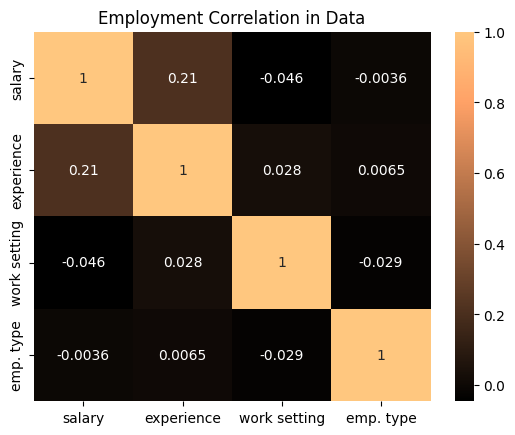

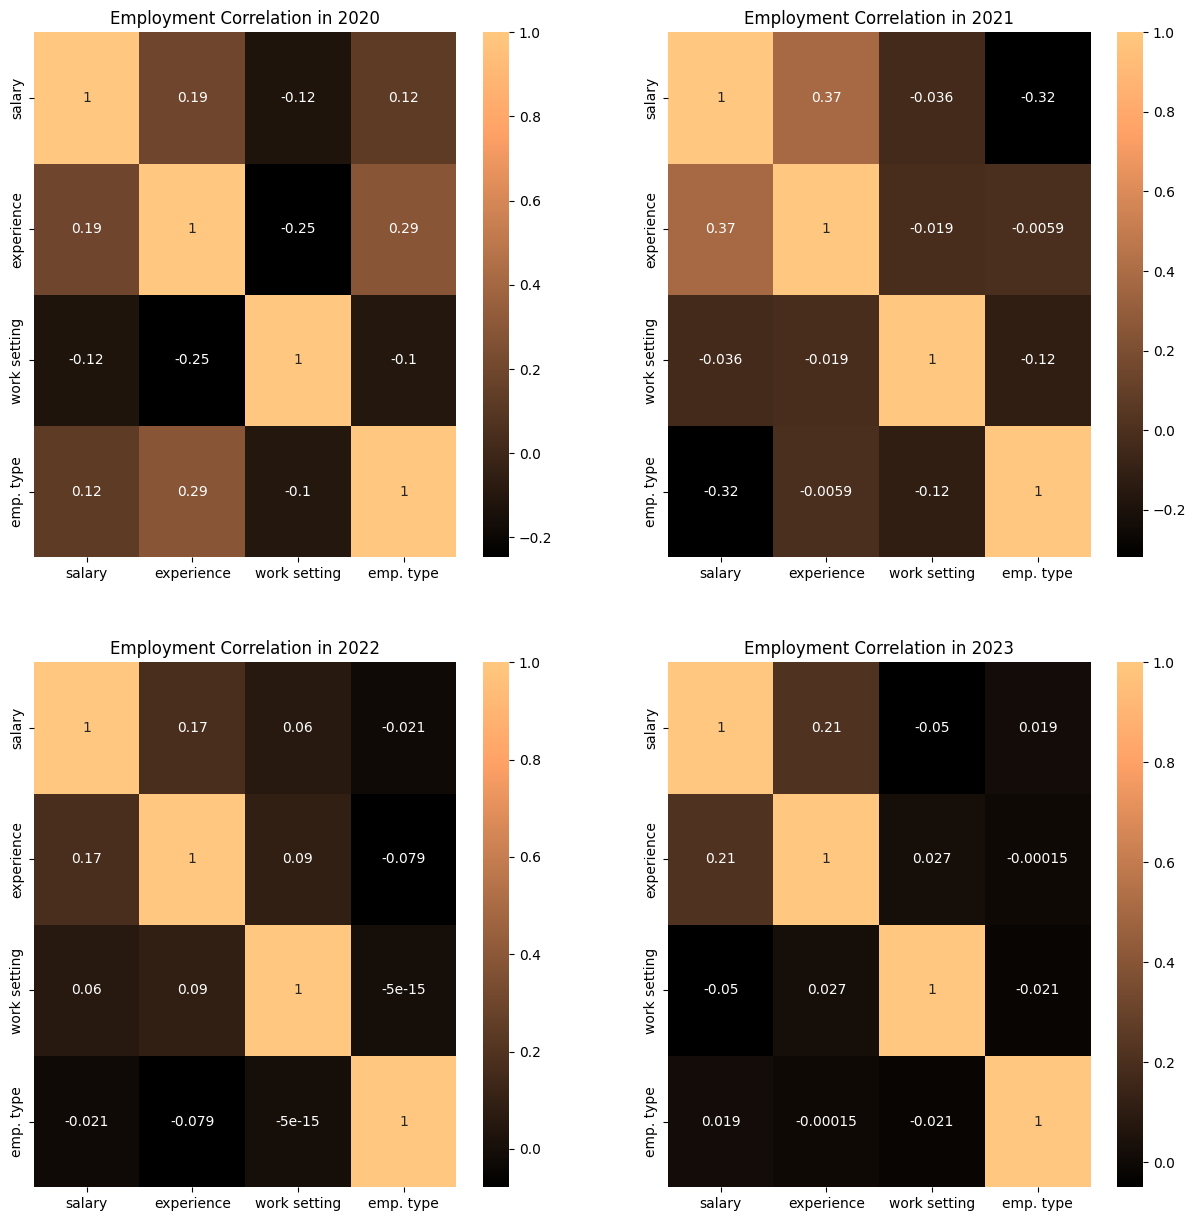

In [7]:
label_encoder = LabelEncoder()
US_data["experience"] = label_encoder.fit_transform(US_data['experience_level'])
US_data["work setting"] = label_encoder.fit_transform(US_data['work_setting'])
US_data["emp. type"] = label_encoder.fit_transform(US_data['employment_type'])

corr_matrix = US_data[['salary', "experience", "work setting", "emp. type"]].corr()
plt.title('Employment Correlation in Data')
sns.heatmap(corr_matrix, annot = True, cmap ='copper')
plt.show()

plt.figure(figsize=(15,15))

plt.subplot(221)
year1 = US_data[US_data['year']==US_data['year'].min()]
corr_matrix = year1[['salary', "experience", "work setting", "emp. type"]].corr()
plt.title('Employment Correlation in ' + str(int(year1['year'].unique())))
sns.heatmap(corr_matrix, annot = True, cmap ='copper')

plt.subplot(222)
year2 = US_data[US_data['year']==US_data['year'].min()+1]
corr_matrix = year2[['salary', "experience", "work setting", "emp. type"]].corr()
plt.title('Employment Correlation in ' + str(int(year2['year'].unique())))
sns.heatmap(corr_matrix, annot = True, cmap ='copper')

plt.subplot(223)
year3 = US_data[US_data['year']==US_data['year'].min()+2]
corr_matrix = year3[['salary', "experience", "work setting", "emp. type"]].corr()
plt.title('Employment Correlation in ' + str(int(year3['year'].unique())))
sns.heatmap(corr_matrix, annot = True, cmap ='copper')

plt.subplot(224)
year4 = US_data[US_data['year']==US_data['year'].min()+3]
corr_matrix = year4[['salary', "experience", "work setting", "emp. type"]].corr()
plt.title('Employment Correlation in ' + str(int(year4['year'].unique())))
sns.heatmap(corr_matrix, annot = True, cmap ='copper')

plt.show()

In [8]:
stats = US_data.describe()
stats

,salary,experience,work setting,emp. type
count,8080.000000,8080.000000,8080.000000,8080.000000
mean,158598.940223,2.648515,1.350866,0.999134
std,59228.911481,0.728853,0.487026,0.040104
min,24000.000000,0.000000,0.000000,0.000000
25%,117875.000000,3.000000,1.000000,1.000000
50%,150000.000000,3.000000,1.000000,1.000000
75%,192000.000000,3.000000,2.000000,1.000000
max,450000.000000,3.000000,2.000000,2.000000


In [9]:
y1_stats = year1.describe()
y1_stats

,salary,experience,work setting,emp. type
count,28.000000,28.000000,28.000000,28.000000
mean,160555.357143,1.678571,1.607143,0.964286
std,99650.709740,1.123934,0.737327,0.188982
min,70000.000000,0.000000,0.000000,0.000000
25%,99500.000000,0.750000,1.750000,1.000000
50%,119000.000000,2.000000,2.000000,1.000000
75%,188500.000000,2.250000,2.000000,1.000000
max,450000.000000,3.000000,2.000000,1.000000


In [10]:
y2_stats = year2.describe()
y2_stats

,salary,experience,work setting,emp. type
count,87.000000,87.000000,87.000000,87.000000
mean,147206.034483,1.965517,1.551724,0.965517
std,69393.337087,1.104413,0.727510,0.183523
min,50000.000000,0.000000,0.000000,0.000000
25%,96575.000000,2.000000,1.000000,1.000000
50%,140000.000000,2.000000,2.000000,1.000000
75%,182500.000000,3.000000,2.000000,1.000000
max,423000.000000,3.000000,2.000000,1.000000


In [11]:
y3_stats = year3.describe()
y3_stats

,salary,experience,work setting,emp. type
count,1323.000000,1323.000000,1323.000000,1323.000000
mean,148294.352230,2.660620,1.526833,1.000000
std,50922.812594,0.738307,0.520239,0.038895
min,24000.000000,0.000000,0.000000,0.000000
25%,114450.000000,3.000000,1.000000,1.000000
50%,142127.000000,3.000000,2.000000,1.000000
75%,180000.000000,3.000000,2.000000,1.000000
max,405000.000000,3.000000,2.000000,2.000000


In [12]:
y4_stats = year4.describe()
y4_stats

,salary,experience,work setting,emp. type
count,6642.000000,6642.000000,6642.000000,6642.000000
mean,160792.462210,2.659139,1.312105,0.999548
std,60175.222882,0.711754,0.465980,0.032463
min,24000.000000,0.000000,0.000000,0.000000
25%,120000.000000,3.000000,1.000000,1.000000
50%,151600.000000,3.000000,1.000000,1.000000
75%,198200.000000,3.000000,2.000000,1.000000
max,405000.000000,3.000000,2.000000,2.000000


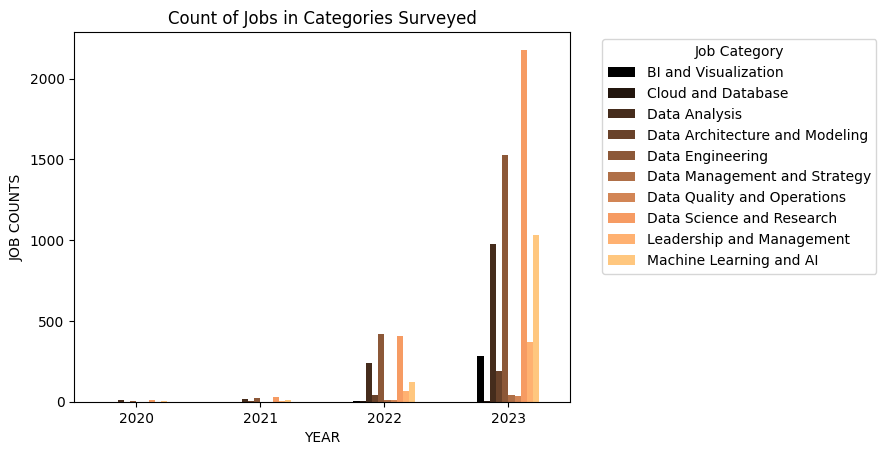

In [13]:
jcat2 = US_data.groupby(['year'])['job_category'].value_counts().unstack().fillna(0)

ax = jcat2.plot.bar(title='Count of Jobs in Categories Surveyed', cmap='copper')
plt.legend(title='Job Category', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.ylabel("JOB COUNTS")
plt.xlabel("YEAR")

plt.show()

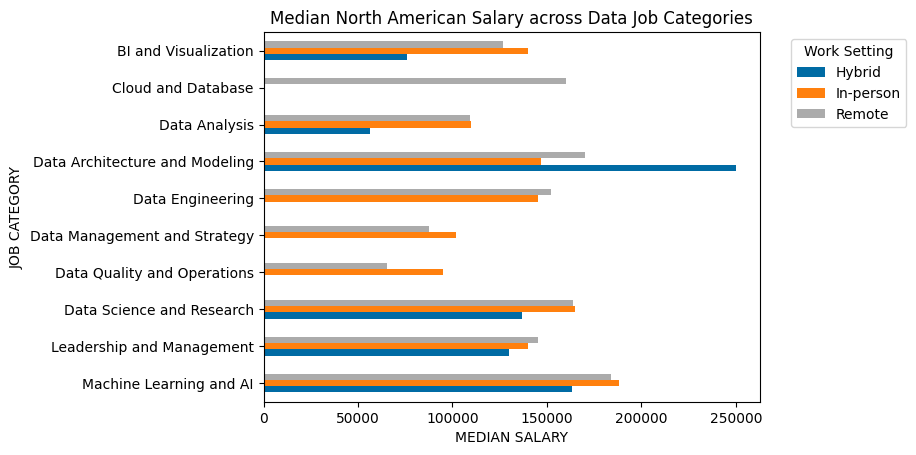

In [14]:
jcat = US_data.groupby(['job_category', 'work_setting'])['salary'].median().unstack().fillna(
    0).sort_index(ascending=False)

jcat.plot.barh(title='Median North American Salary across Data Job Categories', legend=True)
plt.legend(title='Work Setting', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlabel('MEDIAN SALARY')
plt.ylabel('JOB CATEGORY')
plt.show()

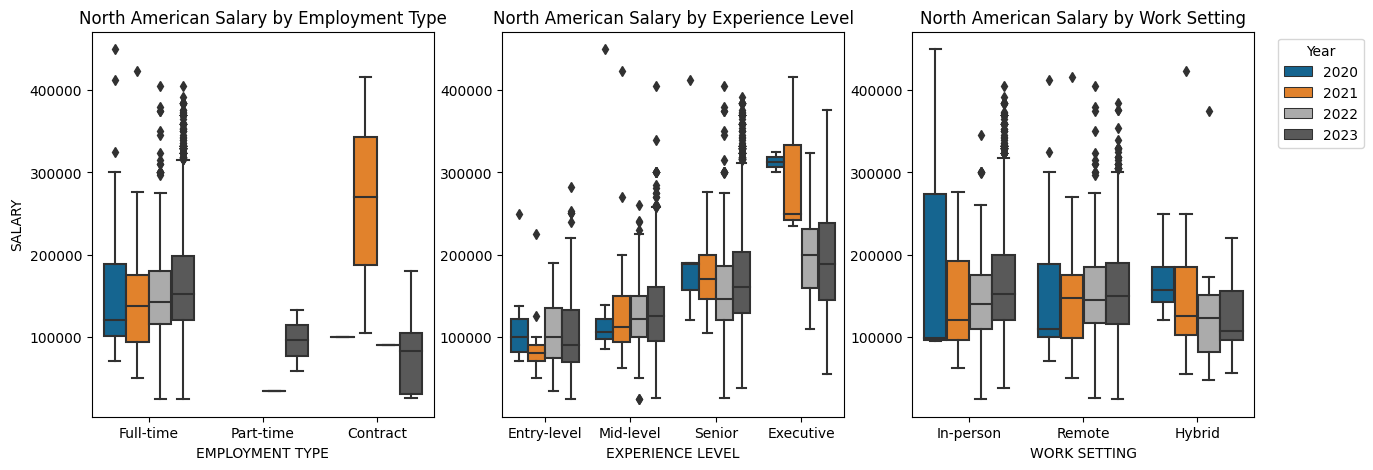

In [15]:
exp_order='Entry-level', 'Mid-level', 'Senior', 'Executive'

plt.figure(figsize=(15,5))

plt.subplot(131)
sns.boxplot(data=US_data, x='employment_type', y='salary',hue='year')
plt.xlabel('EMPLOYMENT TYPE')
plt.ylabel('SALARY')
plt.legend().remove()
plt.title('North American Salary by Employment Type')

plt.subplot(132)
sns.boxplot(data=US_data, x='experience_level', y='salary', hue='year'
            , order=exp_order)
plt.legend().remove()
plt.ylabel("")
plt.xlabel('EXPERIENCE LEVEL')
plt.title('North American Salary by Experience Level')

plt.subplot(133)
sns.boxplot(data=US_data, x='work_setting', y='salary', hue='year')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel("")
plt.xlabel('WORK SETTING')
plt.title('North American Salary by Work Setting')

plt.show()

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:crimson;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h3 style='padding: 20px;
              color:white;
              text-align:center;'>
        Most Recent Salary Details
    </h3>
    </div>

> Since the Experience level is the most significant factor in determining salary and majority of the respondents are full-time employees, let's assess the salary breakdown for full-time employees by experience for the most recent 2 years

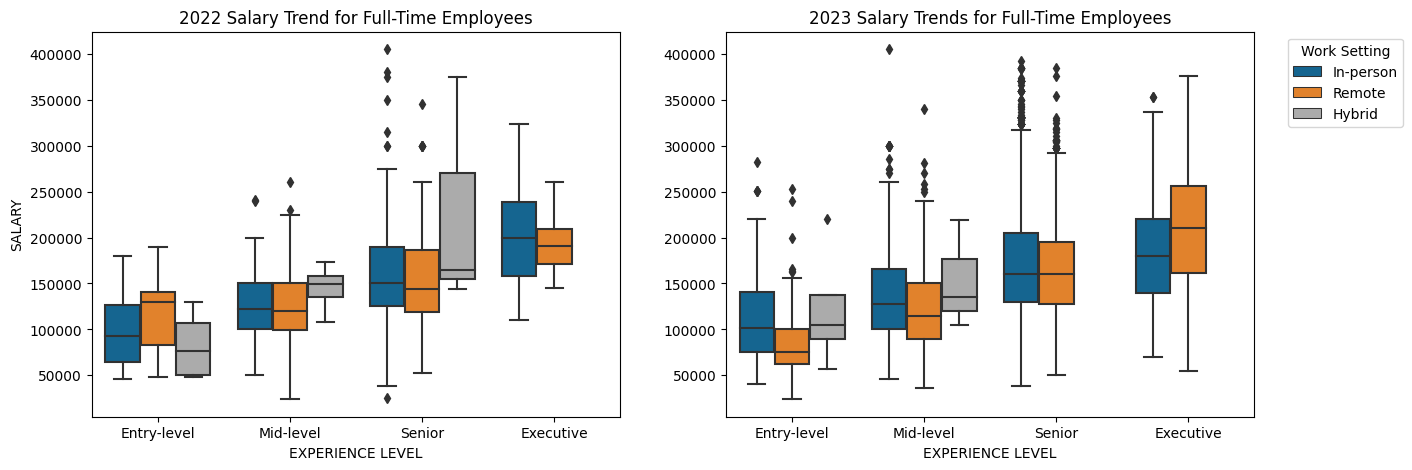

In [16]:
this_year = US_data['year'].max()
last_year = US_data['year'].max()-1
emp_type = 'Full-time'

plt.figure(figsize=(15,5))
plt.subplot(121)

# Getting the penultimate year data
lyear = US_data.query('year == @last_year and employment_type == @emp_type')
sns.boxplot(data=lyear, x='experience_level', y='salary',hue='work_setting', order=exp_order)
plt.xlabel('EXPERIENCE LEVEL')
plt.ylabel('SALARY')
plt.legend().remove()
plt.title(str(last_year) + ' Salary Trend for Full-Time Employees')

plt.subplot(122)
# Getting the most recent year data
present = US_data.query('year == @this_year and employment_type == @emp_type')
sns.boxplot(data=present, x='experience_level', y='salary',hue='work_setting', order=exp_order)
plt.xlabel('EXPERIENCE LEVEL')
plt.legend(title='Work Setting', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title(str(this_year) + ' Salary Trends for Full-Time Employees')
plt.ylabel('')

plt.show()

In [17]:
# getting the past 2 years of data to make % comparisons
present_data = present.groupby(['employment_type', 'experience_level', 'work_setting'])['salary'].median()
lyear_data = lyear.groupby(['employment_type','experience_level', 'work_setting'])['salary'].median()

recent_data = pd.merge(lyear_data, present_data, on=['employment_type', 'experience_level', 'work_setting']
                       , suffixes=('_lastyear', '_present'))
recent_data.fillna(0, inplace=True)

# Calculate percentage change for the past 2 years
recent_data['%_change'] = ((recent_data['salary_present'] - recent_data['salary_lastyear']) 
                           / recent_data['salary_lastyear']) * 100

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:crimson;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h3 style='padding: 20px;
              color:white;
              text-align:center;'>
        FINDINGS
    </h3>
    </div>

In [18]:
# Defining new variables for summary of findings
years = sorted(US_data['year'].unique())
x = int(US_data['year'].value_counts().describe()[0])
y = US_data['job_category'].unique()
exp = US_data['experience_level'].unique()
UScount = int(stats.iloc[0,0])
m = "{:,.2f}".format(US_data['salary'].median())
medianpaypercentage = "{:,.2f}".format((US_data[US_data['salary']==US_data['salary'].median()].count()[0] / UScount)* 100)
maxpay = US_data[US_data['salary']==stats.iloc[-1,0]]
minpay = US_data[US_data['salary']==stats.iloc[3,0]]

In [19]:
# Assessment findings
print(
f'\t This assessment is an in-depth analysis of the salary details for \
North American employers whose employees are also located in North America. \
The dataset contains {x} years of salary details for Data-related \
careers from {years[0]} to {years[3]} and comprises {"{:,}".format(UScount)} records, with \
{"{:,}".format(int(y1_stats.iloc[0,0]))} collected in {years[0]}, \
{"{:,}".format(int(y2_stats.iloc[0,0]))} in {years[1]}, \
{"{:,}".format(int(y3_stats.iloc[0,0]))} in {years[2]}, \
and {"{:,}".format(int(y4_stats.iloc[0,0]))} in {years[3]}. \
The Data job categories reported include {y}. \n\
Participants reported experience levels as follows: {exp} \n\n\t\
The maximum reported salary across all categories over the {x} years is \
${"{:,.2f}".format(stats.iloc[-1,0])} for a {maxpay.iloc[0,4]} {maxpay.iloc[0,1]}. \
Conversely, the minimum reported salary stands at ${"{:,.2f}".format(stats.iloc[3,0])} \
for a {minpay.iloc[0,4]} {minpay.iloc[0,1]}. The median salary is ${m} within which \
{medianpaypercentage}% of the total reported jobs fall.\n\n\t\
Salary directly correlates with experience level and has an inverse correlation with work location. \
On average, employees with more experience report higher salaries whereas the location of work \
does not have a significant effect on salary. Full-time, in-person employees are the highest paid \
among all surveyed, closely followed by full-time remote employees. Notably, \
Machine learning and AI claim the title of the highest-paying job category for both \
in-person and remote data professionals; while data architecture and modeling proves to be \
most lucrative for hybrid employees. \n\n\t\
The median salary reported across experience levels for full-time emploees has remained neutral \
for the most recent 2 year period. See the most recent median salary comparison data below:\
    ')
recent_data

	 This assessment is an in-depth analysis of the salary details for North American employers whose employees are also located in North America. The dataset contains 4 years of salary details for Data-related careers from 2020 to 2023 and comprises 8,080 records, with 28 collected in 2020, 87 in 2021, 1,323 in 2022, and 6,642 in 2023. The Data job categories reported include ['Data Architecture and Modeling' 'Data Science and Research'
 'Machine Learning and AI' 'Data Engineering' 'Data Analysis'
 'Leadership and Management' 'BI and Visualization'
 'Data Management and Strategy' 'Data Quality and Operations'
 'Cloud and Database']. 
Participants reported experience levels as follows: ['Senior' 'Mid-level' 'Executive' 'Entry-level'] 

	The maximum reported salary across all categories over the 4 years is $450,000.00 for a Mid-level Research Scientist. Conversely, the minimum reported salary stands at $24,000.00 for a Entry-level Data Scientist. The median salary is $150,000.00 within whi

salary_lastyear  \
employment_type experience_level work_setting                    
Full-time       Entry-level      Hybrid                76000.0   
                                 In-person            130000.0   
                                 Remote                93000.0   
                Executive        In-person            191080.0   
                                 Remote               200000.0   
                Mid-level        Hybrid               149000.0   
                                 In-person            120000.0   
                                 Remote               122500.0   
                Senior           In-person            144000.0   
                                 Remote               150000.0   

                                               salary_present   %_change  
employment_type experience_level work_setting                             
Full-time       Entry-level      Hybrid              105000.0  38.157895  
                                 In-person           102000.0 -21.538462  
                                 Remote               75000.0 -19.354839  
                Executive        In-person           180000.0  -5.798618  
                                 Remote              210914.0   5.457000  
                Mid-level        Hybrid              135000.0  -9.395973  
                                 In-person           128000.0   6.666667  
                                 Remote              115000.0  -6.122449  
                Senior           In-person           160000.0  11.111111  
                                 Remote              160000.0   6.666667

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:crimson;
            font-size:100%;
            font-family:Ariel;
            letter-spacing:1px">
    <h3 style='padding: 20px;
              color:white;
              text-align:center;'>
        THANK YOU
    </h3>
    </div>